In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [4]:
df.shape

(1418, 13)

In [5]:
df.describe()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,709.500000,6.114245,1971.600846,1061.712271,1519.645275,1.565585,1.763752,472.617772,182089.485896
std,409.485653,1.385858,30.064293,437.277589,527.412584,0.551127,0.755995,216.068677,79970.934085
min,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,355.250000,5.000000,1954.000000,796.500000,1132.500000,1.000000,1.000000,324.250000,130000.000000
50%,709.500000,6.000000,1973.000000,994.000000,1468.500000,2.000000,2.000000,478.000000,164800.000000
75%,1063.750000,7.000000,2001.000000,1303.500000,1786.000000,2.000000,2.000000,576.000000,215000.000000
max,1418.000000,10.000000,2010.000000,6110.000000,5642.000000,3.000000,4.000000,1418.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
Id             1418 non-null int64
OverallQual    1418 non-null int64
YearBuilt      1418 non-null int64
TotalBsmtSF    1418 non-null int64
Electrical     1417 non-null object
GrLivArea      1418 non-null int64
FullBath       1418 non-null int64
GarageType     1275 non-null object
GarageCars     1418 non-null int64
GarageArea     1418 non-null int64
Fence          270 non-null object
MiscFeature    52 non-null object
SalePrice      1418 non-null int64
dtypes: int64(9), object(4)
memory usage: 121.9+ KB


In [7]:
df.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

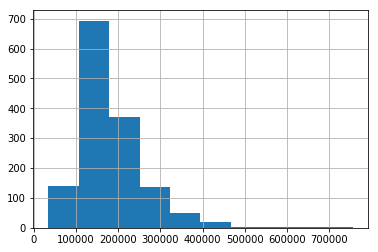

In [8]:
df['SalePrice'].hist() # positively skewed

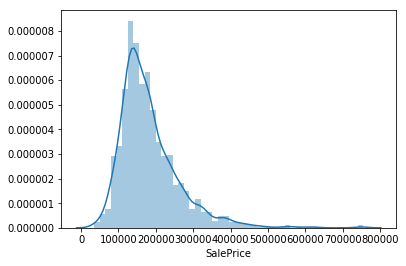

In [9]:
sns.distplot(df['SalePrice'])

In [10]:
df['SalePrice'].skew()

1.8646120239750106

In [11]:
df['SalePrice'].kurt()

6.432852054835754

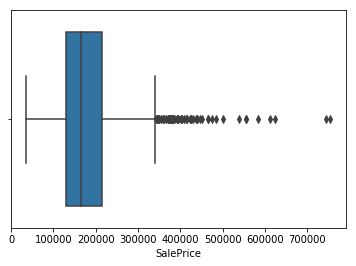

In [12]:
sns.boxplot(df['SalePrice'])

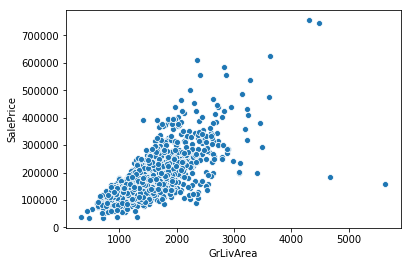

In [13]:
sns.scatterplot(y='SalePrice',x='GrLivArea',data=df)

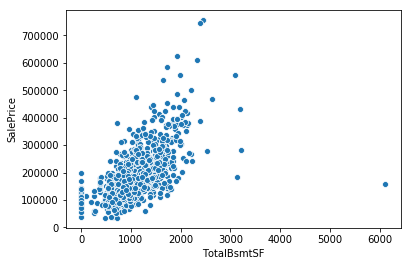

In [14]:
sns.scatterplot(y='SalePrice',x='TotalBsmtSF',data=df)

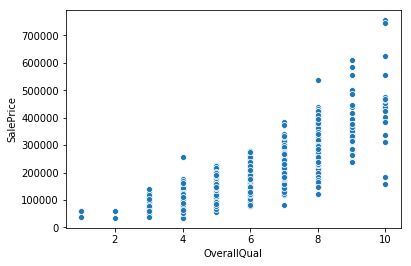

In [15]:
sns.scatterplot(y='SalePrice',x='OverallQual',data=df)

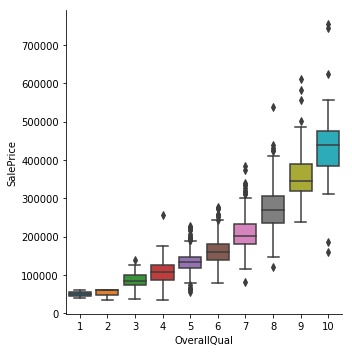

In [16]:
sns.catplot(y='SalePrice',x='OverallQual',data=df,kind='box')

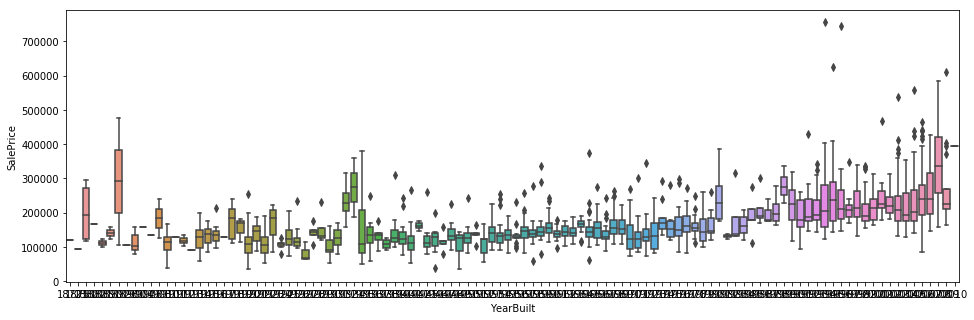

In [17]:
plt.subplots(figsize=(16,5))
sns.boxplot(y='SalePrice',x='YearBuilt',data=df) ## check how to rotate year bilt in 90 degree 

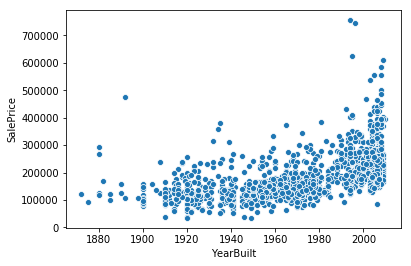

In [18]:
sns.scatterplot(y='SalePrice',x='YearBuilt',data=df)

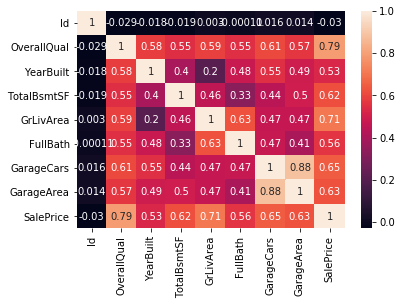

In [19]:
sns.heatmap(df.corr(),annot = True)

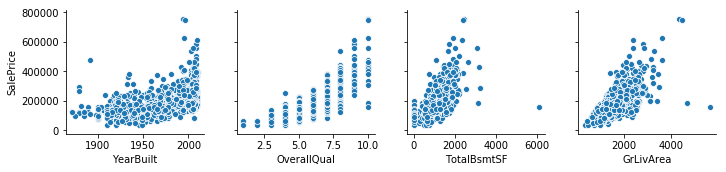

In [20]:
sns.pairplot(x_vars=['YearBuilt','OverallQual','TotalBsmtSF','GrLivArea'],y_vars=['SalePrice'],data=df)

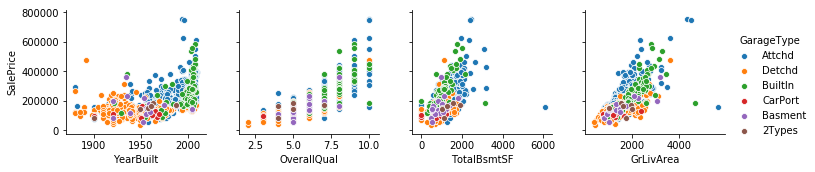

In [21]:
sns.pairplot(x_vars=['YearBuilt','OverallQual','TotalBsmtSF','GrLivArea'],y_vars=['SalePrice'],data=df,hue='GarageType')

In [22]:
total_missing = df.isnull().sum().sort_values(ascending = False)

In [23]:
percent_missing = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

In [24]:
percent_missing

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
SalePrice       0.000000
GarageArea      0.000000
GarageCars      0.000000
FullBath        0.000000
GrLivArea       0.000000
TotalBsmtSF     0.000000
YearBuilt       0.000000
OverallQual     0.000000
Id              0.000000
dtype: float64

In [25]:
total_mis = 100*df.isnull().sum()/len(df)
total_mis.sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
SalePrice       0.000000
GarageArea      0.000000
GarageCars      0.000000
FullBath        0.000000
GrLivArea       0.000000
TotalBsmtSF     0.000000
YearBuilt       0.000000
OverallQual     0.000000
Id              0.000000
dtype: float64

In [26]:
df.drop(columns=['MiscFeature','Fence'],inplace=True)

In [27]:
df.isnull().sum()

Id               0
OverallQual      0
YearBuilt        0
TotalBsmtSF      0
Electrical       1
GrLivArea        0
FullBath         0
GarageType     143
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [28]:
df[df['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500


In [29]:
df['Electrical'].fillna(method='ffill')

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1413    SBrkr
1414    SBrkr
1415    SBrkr
1416    FuseA
1417    SBrkr
Name: Electrical, Length: 1418, dtype: object

In [30]:
df_new = df.iloc[1337:1342].copy()
df_new

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1337,1338,5,1941,984,SBrkr,1604,2,Detchd,2,660,117000
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500
1341,1342,6,1970,1205,SBrkr,2117,2,Attchd,2,550,237500


In [31]:
df_new['Electrical'].fillna(method='bfill')

1337    SBrkr
1338    SBrkr
1339    FuseF
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [32]:
df_new['Electrical'].fillna('ABC')

1337    SBrkr
1338    SBrkr
1339      ABC
1340    FuseF
1341    SBrkr
Name: Electrical, dtype: object

In [33]:
df_new.loc[1339,'Electrical']= 'FuseF'

In [34]:
df.dropna(subset= ['Electrical'] ,inplace=True)

In [35]:
df[df['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,170000
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,84500


In [36]:
df.groupby('GarageCars').median()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice
GarageCars,,,,,,,,
0,614.0,5.0,1940.0,780.0,1080.0,1.0,0.0,100000.0
1,685.0,5.0,1954.0,876.0,1149.0,1.0,288.0,128100.0
2,728.5,6.0,1984.0,1030.5,1504.0,2.0,506.0,179470.0
3,666.0,8.0,2005.0,1572.0,1962.0,2.0,818.0,295000.0
4,1156.0,5.0,1969.0,1248.0,1622.0,1.0,864.0,200000.0


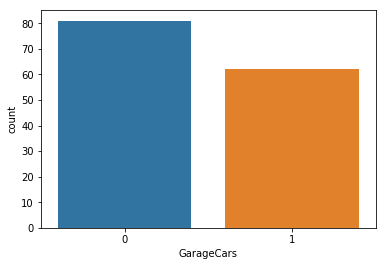

In [37]:
sns.countplot('GarageCars', data=df[df['GarageType'].isnull()])

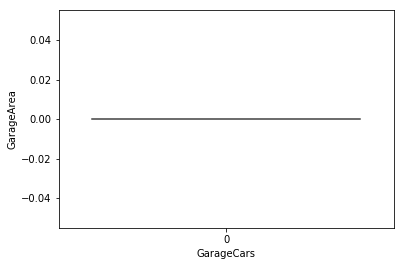

In [38]:
sns.violinplot('GarageCars','GarageArea',data=df[df['GarageCars']==0])

In [39]:
df[df['GarageCars']==0]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [40]:
df['GarageType'].isnull().sum()

143

In [41]:
df['GarageType']=np.where(df['GarageCars']==1 & df['GarageType'].isnull(),'Detchd',df['GarageType'])
df['GarageType']=np.where(df['GarageCars']==0 & df['GarageType'].isnull(),'NoGarage',df['GarageType'])

In [42]:
df.tail(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1408,1409,5,1974,896,SBrkr,1792,2,NoGarage,0,0,136000
1409,1410,8,2008,1573,SBrkr,1578,2,Attchd,3,840,287090
1410,1411,5,2005,547,SBrkr,1072,1,Basment,2,525,145000
1411,1412,5,2006,1140,SBrkr,1140,1,NoGarage,0,0,84500
1412,1413,7,2004,1221,SBrkr,1221,2,Attchd,2,400,185000
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,147500


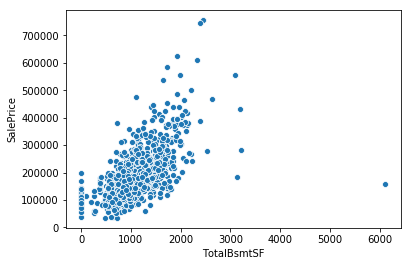

In [43]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice',data=df)

In [44]:
df[df['TotalBsmtSF']>5500]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


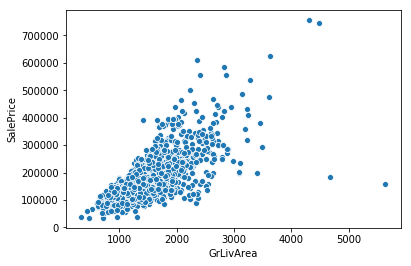

In [45]:
sns.scatterplot(x='GrLivArea', y='SalePrice',data=df)

In [46]:
df[df['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [47]:
df.sort_values(by='GrLivArea', ascending = False)
a=df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)]

In [48]:
a

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [49]:
df.drop(a.index, inplace=True)

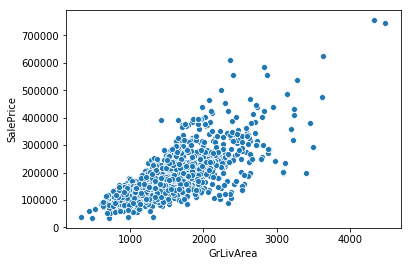

In [50]:
sns.scatterplot(x='GrLivArea', y='SalePrice',data=df)

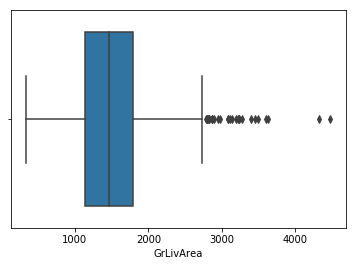

In [51]:
sns.boxplot('GrLivArea',data=df)

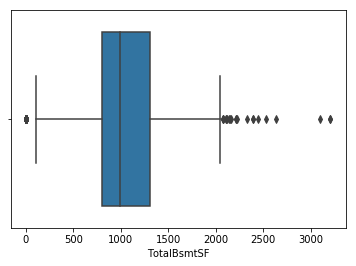

In [52]:
sns.boxplot('TotalBsmtSF',data=df)

In [53]:
df['TotalBsmtSF'].skew()

0.5405539180305146

In [54]:
Q1_TotalBsmtSF = df['TotalBsmtSF'].quantile(.25)
Q1_TotalBsmtSF

797.0

In [55]:
Q3_TotalBsmtSF = df['TotalBsmtSF'].quantile(.75)
Q3_TotalBsmtSF

1302.0

In [56]:
 IQR = Q3_TotalBsmtSF - Q1_TotalBsmtSF

In [57]:
LL_TotalBsmtSF = Q1_TotalBsmtSF - 1.5*(IQR)
LL_TotalBsmtSF

39.5

In [58]:
UL_TotalBsmtSF = Q1_TotalBsmtSF + 1.5*(IQR)
UL_TotalBsmtSF

1554.5

In [59]:
df[df['TotalBsmtSF']<39.5].shape

(33, 11)

In [60]:
df[df['TotalBsmtSF']>2059.5].shape

(21, 11)

In [61]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)


In [62]:
Q1

Id                354.5
OverallQual         5.0
YearBuilt        1954.0
TotalBsmtSF       797.0
GrLivArea        1131.5
FullBath            1.0
GarageCars          1.0
GarageArea        323.0
SalePrice      130000.0
Name: 0.25, dtype: float64

In [63]:
df_box_plot = pd.concat([LL,Q1,Q3,UL],axis=1, keys = ['LL','Q1','Q3','UL'])

In [64]:
df_box_plot

,LL,Q1,Q3,UL
Id,-707.50,354.5,1062.5,2124.50
OverallQual,2.00,5.0,7.0,10.00
YearBuilt,1883.50,1954.0,2001.0,2071.50
TotalBsmtSF,39.50,797.0,1302.0,2059.50
GrLivArea,151.25,1131.5,1785.0,2765.25
FullBath,-0.50,1.0,2.0,3.50
GarageCars,-0.50,1.0,2.0,3.50
GarageArea,-56.50,323.0,576.0,955.50
SalePrice,2500.00,130000.0,215000.0,342500.00


## Capping the Qutlier

In [65]:
df[df['TotalBsmtSF']>3000].shape[0]

3

In [66]:
df.drop(df[df['TotalBsmtSF']>3000].index, inplace = True) ## after removing this make again boxplot to check the boxplot changes

In [67]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [68]:
df_box_plot = pd.concat([LL,Q1,Q3,UL],axis=1, keys = ['LL','Q1','Q3','UL'])

In [69]:
df_box_plot

,LL,Q1,Q3,UL
Id,-708.000,354.75,1063.25,2126.000
OverallQual,2.000,5.00,7.00,10.000
YearBuilt,1884.625,1954.00,2000.25,2069.625
TotalBsmtSF,41.125,796.00,1299.25,2054.125
GrLivArea,157.125,1131.00,1780.25,2754.125
FullBath,-0.500,1.00,2.00,3.500
GarageCars,-0.500,1.00,2.00,3.500
GarageArea,-60.250,321.50,576.00,957.750
SalePrice,2500.000,130000.00,215000.00,342500.000


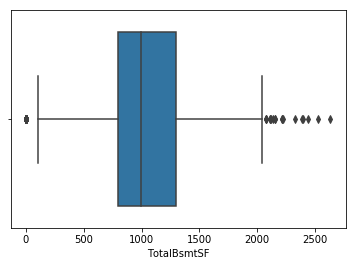

In [70]:
sns.boxplot('TotalBsmtSF',data=df)

In [71]:
df['TotalBsmtSF'] = np.where(df['TotalBsmtSF']>2054,2054,df['TotalBsmtSF'])

In [72]:
df['TotalBsmtSF'] = np.where(df['TotalBsmtSF']<42,42,df['TotalBsmtSF'])

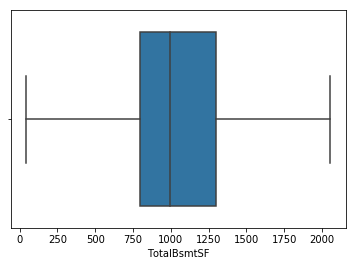

In [73]:
sns.boxplot('TotalBsmtSF',data=df)

In [74]:
df.shape

(1412, 11)

## Using 3 STD techniques to identify and handle outliersm

In [75]:
UL_GrLivArea = df['GrLivArea'].mean() +3*df['GrLivArea'].std()
UL_GrLivArea

3035.1601357013774

In [76]:
LL_GrLivArea = df['GrLivArea'].mean() -3*df['GrLivArea'].std()
LL_GrLivArea

-9.825858080980652

In [77]:
a=df[(df['GrLivArea']<LL_GrLivArea) | (df['GrLivArea']>UL_GrLivArea)]
a

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
107,108,7,1990,1673,SBrkr,3222,3,Attchd,3,594,320000
169,170,10,1892,1107,SBrkr,3608,2,Detchd,3,840,475000
179,180,8,1918,1360,SBrkr,3112,2,Detchd,2,795,235000
285,286,7,1880,1470,SBrkr,3493,3,Attchd,3,870,295000
583,584,8,1934,965,SBrkr,3194,2,Basment,2,380,359100
610,611,6,1914,1440,FuseA,3395,2,NoGarage,0,0,200000
665,666,10,1994,2054,SBrkr,4316,3,Attchd,3,832,755000
742,743,8,2003,1650,SBrkr,3279,3,BuiltIn,3,841,538000
770,771,9,2008,1926,SBrkr,3140,3,BuiltIn,3,820,485000
998,999,7,1920,824,SBrkr,3082,2,Basment,2,672,197000


In [78]:
df.drop(a.index,inplace=True)

In [79]:
df[(df['GrLivArea']<LL_GrLivArea) | (df['GrLivArea']>UL_GrLivArea)]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice


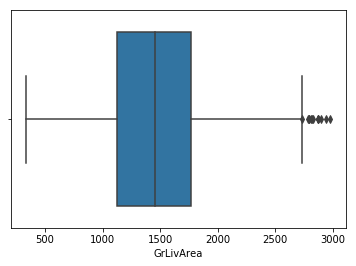

In [80]:
sns.boxplot(df['GrLivArea'],data =df)

In [81]:
df['Zscore_GarageArea'] = (df['GarageArea'] - df['GarageArea'].mean())/df['GarageArea'].std()

In [82]:
df

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500,0.371064
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500,-0.043155
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500,0.653486
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000,0.813525
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000,1.726689
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000,-0.043155
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000,0.145126
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500,-1.022218
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125,-1.078702


In [83]:
max_thresold = df['SalePrice'].quantile(.95)

In [84]:
df[df['SalePrice']>max_thresold]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
10,11,9,2005,1175,SBrkr,2324,3,BuiltIn,3,736,345000,1.255986
18,19,8,2005,1158,SBrkr,2376,3,BuiltIn,3,853,325300,1.806709
50,51,9,1981,1842,SBrkr,1842,0,Attchd,3,894,385000,1.999697
55,56,10,2006,1410,SBrkr,2945,3,BuiltIn,3,641,438780,0.808818
101,102,7,2007,1264,SBrkr,2696,2,BuiltIn,3,792,383970,1.519580
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,1276,9,1999,1393,SBrkr,2599,2,BuiltIn,3,779,333168,1.458388
1333,1334,10,2001,2054,SBrkr,2633,2,Attchd,3,804,466500,1.576064
1348,1349,9,2006,1746,SBrkr,1746,2,Attchd,3,758,377500,1.359541
1376,1377,8,1998,1284,SBrkr,2450,2,Attchd,3,1069,340000,2.823428


In [85]:
min_thresold = df['SalePrice'].quantile(.05)

In [86]:
df[df['SalePrice']<min_thresold]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
27,28,4,1927,520,SBrkr,520,1,Detchd,1,240,68500,-1.078702
28,29,4,1920,649,SBrkr,1317,1,Detchd,1,250,40000,-1.031632
37,38,4,1955,42,FuseP,1152,2,NoGarage,0,0,82000,-2.208390
63,64,4,1945,747,SBrkr,747,1,Detchd,1,220,80000,-1.172843
79,80,3,1915,1013,SBrkr,1526,1,NoGarage,0,0,85000,-2.208390
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1299,4,1941,693,FuseA,693,1,NoGarage,0,0,52500,-2.208390
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,83000,-0.965734
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,58500,-1.266984
1391,1392,4,1927,656,SBrkr,968,2,Detchd,1,216,64500,-1.191671


In [87]:
df2 = df[(df.SalePrice<max_thresold) & (df.SalePrice>min_thresold)]
df2.shape

(1252, 12)

In [88]:
df2.describe()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,714.587061,6.051118,1971.718051,1035.759585,1482.613419,1.553514,1.750799,466.361022,173546.970447,-0.013214
std,410.750805,1.173491,29.126443,352.715052,427.680999,0.526981,0.678698,190.591605,52682.583035,0.897121
min,1.000000,3.000000,1872.000000,42.000000,616.000000,0.000000,0.000000,0.000000,89000.000000,-2.208390
25%,360.250000,5.000000,1955.000000,807.750000,1149.500000,1.000000,1.000000,336.000000,133000.000000,-0.626827
50%,723.500000,6.000000,1972.500000,990.000000,1456.000000,2.000000,2.000000,474.000000,163500.000000,0.022743
75%,1073.250000,7.000000,2000.000000,1257.250000,1729.000000,2.000000,2.000000,574.250000,205000.000000,0.494623
max,1418.000000,10.000000,2009.000000,2054.000000,2978.000000,3.000000,4.000000,1390.000000,319900.000000,4.334386


In [89]:
df.describe()

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03
mean,709.142448,6.083035,1971.643522,1046.191124,1491.890480,1.551181,1.753758,469.168218,179098.812455,1.246120e-16
std,409.533826,1.358505,29.832994,388.078844,466.736245,0.539015,0.749065,212.448054,73464.812646,1.000000e+00
min,1.000000,1.000000,1872.000000,42.000000,334.000000,0.000000,0.000000,0.000000,34900.000000,-2.208390e+00
25%,355.000000,5.000000,1954.000000,796.000000,1128.000000,1.000000,1.000000,319.000000,130000.000000,-7.068468e-01
50%,710.000000,6.000000,1973.000000,992.000000,1456.000000,2.000000,2.000000,476.000000,163500.000000,3.215743e-02
75%,1062.000000,7.000000,2001.000000,1286.000000,1768.000000,2.000000,2.000000,576.000000,214000.000000,5.028607e-01
max,1418.000000,10.000000,2010.000000,2054.000000,2978.000000,3.000000,4.000000,1390.000000,611657.000000,4.334386e+00


In [91]:
df.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice,Zscore_GarageArea
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500,0.371064
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500,-0.043155
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500,0.653486
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000,0.813525
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000,1.726689


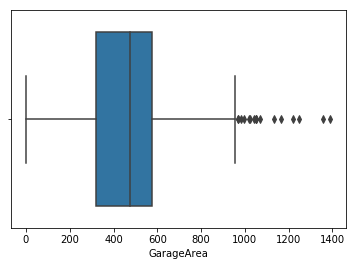

In [92]:
sns.boxplot('GarageArea',data=df)

In [93]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [95]:
UL['GarageArea']

961.5

In [96]:
df.loc[df['GarageArea']>961.5, 'GarageArea'] = 961.5

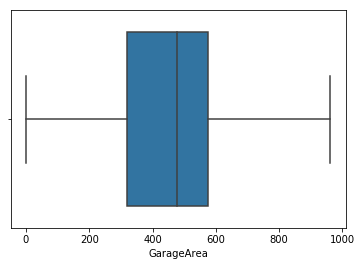

In [97]:
sns.boxplot('GarageArea',data=df)

In [98]:
import pandas_profiling

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\ipykernel\k

In [99]:
from pandas_profiling import ProfileReport

In [101]:
profile = ProfileReport(df)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [102]:
profile

Number of variables,13
Number of observations,1397
Total Missing (%),0.0%
Total size in memory,131.0 KiB
Average record size in memory,96.0 B
Numeric,9
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2
